In [1]:
#import libraries that we will use in our project
# Importing needed Lib
import pandas as pd
import numpy as np
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [3]:
#import our dataset -the file is csv so we will use read_csv to read our file
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#some info about our data\
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#number rows and columns
df.shape

(16598, 11)

In [6]:
#size rows and columns

df.size

182578

In [7]:
#number of unique columns
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [8]:
#is there any missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#is there any duplicated values
df.duplicated().sum()

0

In [10]:
#THERE are duplicated at some columns but will not be affected 
df[df.duplicated(subset=["Name","Genre","Platform","Publisher"],keep="last")]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


In [11]:
#describe our dataset either medain or mean,count and something else
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
#the minimum year and the maximum year
df["Year"].min(),df["Year"].max()

(1980.0, 2020.0)

In [13]:
df.head(2)   # printing the first 2 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [14]:
#rename some columns to be more clear and properly explained
columns=['Rank', 'Name', 'Genre', 'Platform', 'Publisher', 'North_America_Sales','urope_Sales', 'Japan_Sales', 'Other_Sales', 'Global_Sales', 'Year']
df=df.rename(columns={"NA_Sales":"North_America_Sales","EU_Sales":"Europe_Sales","JP_Sales":"Japan_Sales"})

In [15]:
# reindex columns So that every department connects together
columns=['Rank', 'Name', 'Genre', 'Platform', 'Publisher', 'North_America_Sales','Europe_Sales', 'Japan_Sales', 'Other_Sales', 'Global_Sales', 'Year']
df=df.reindex(columns=columns)

In [16]:
#drop unuseful columns and we will not use it later
df.drop(columns="Rank",inplace=True)

In [17]:
df.head(2)

,Name,Genre,Platform,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Year
0,Wii Sports,Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,Super Mario Bros.,Platform,NES,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0


In [18]:
df.isnull().sum()

Name                     0
Genre                    0
Platform                 0
Publisher               58
North_America_Sales      0
Europe_Sales             0
Japan_Sales              0
Other_Sales              0
Global_Sales             0
Year                   271
dtype: int64

In [19]:
#read our Data to explore it    data cleaning over, exploring
df.head(3)

,Name,Genre,Platform,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Year
0,Wii Sports,Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,Super Mario Bros.,Platform,NES,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
2,Mario Kart Wii,Racing,Wii,Nintendo,15.85,12.88,3.79,3.31,35.82,2008.0


In [20]:
df["Platform"].nunique(),df["Publisher"].nunique()

(31, 578)

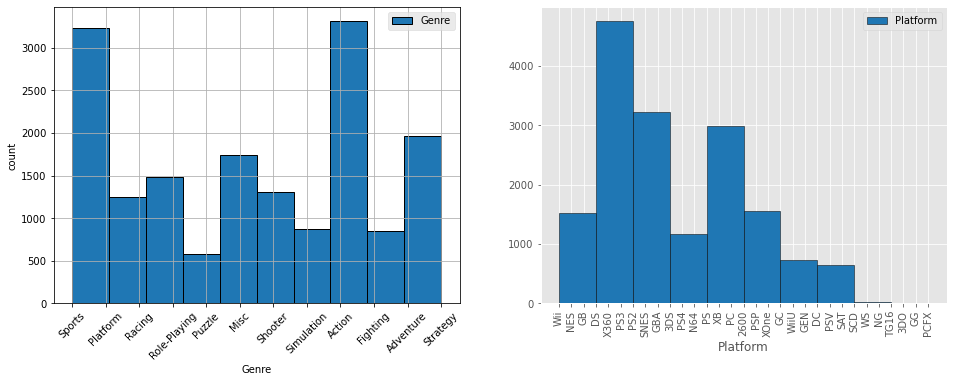

In [21]:
plt.figure(figsize=[16,12])
plt.subplot(2,2,1)
df["Genre"].hist(edgecolor="black",color="#1F77B4",label="Genre")
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Genre")
plt.ylabel("count")
plt.legend()
plt.subplot(2,2,2)
df["Platform"].hist(edgecolor="black",color="#1F77B4",label="Platform")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Platform")
plt.legend()
plt.show()

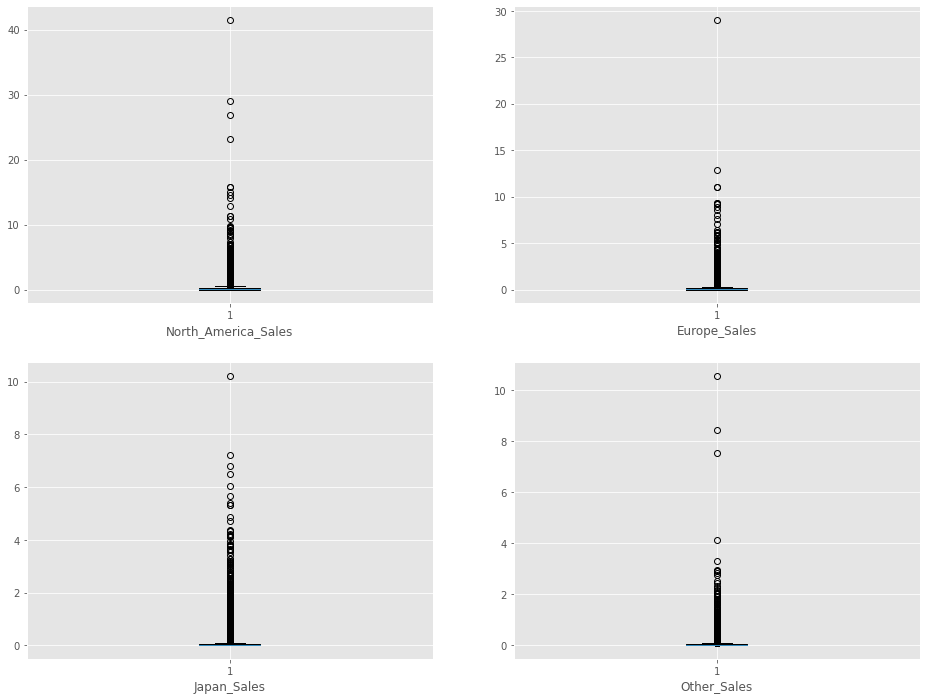

In [22]:
plt.figure(figsize=[16,12])

plt.subplot(2,2,1)
plt.boxplot(df["North_America_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("North_America_Sales")
plt.subplot(2,2,2)
plt.boxplot(df["Europe_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Europe_Sales")
plt.subplot(2,2,3)
plt.boxplot(df["Japan_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Japan_Sales")
plt.subplot(2,2,4)
plt.boxplot(df["Other_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Other_Sales")
plt.show()

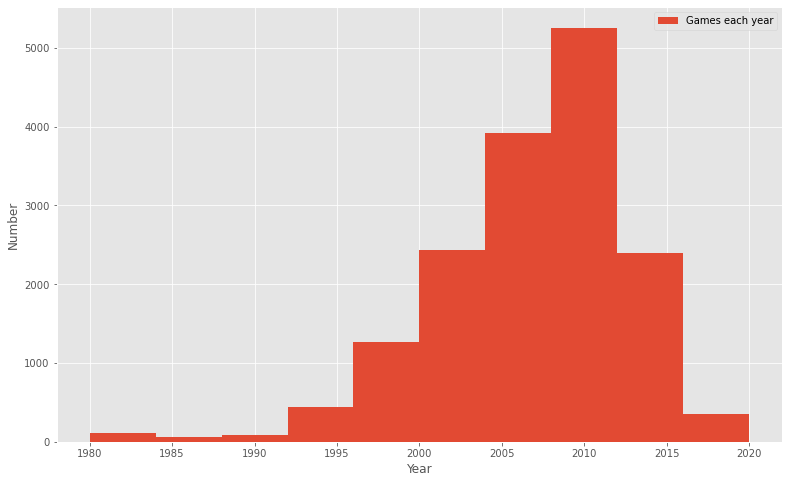

In [23]:
plt.figure(figsize=[13,8])
df["Year"].hist(label="Games each year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend()
plt.show()

In [24]:
df.head(2)

,Name,Genre,Platform,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Year
0,Wii Sports,Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,Super Mario Bros.,Platform,NES,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0


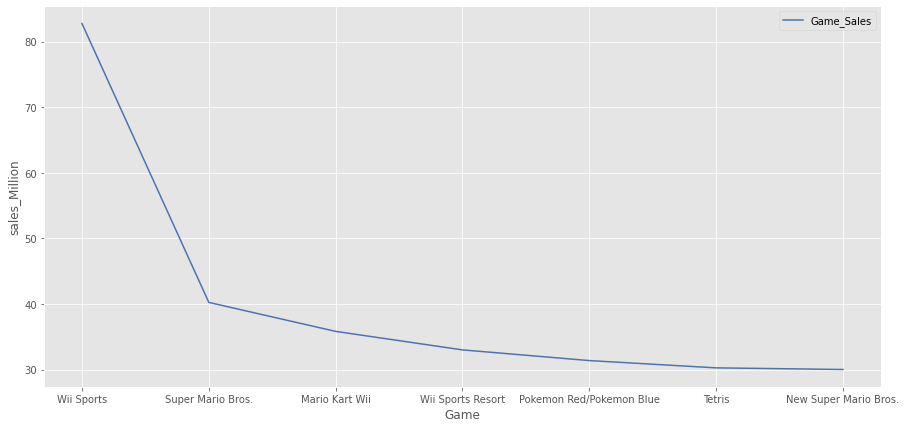

In [25]:
game_sales=df[df["Global_Sales"]>30]
plt.figure(figsize=[15,7])
plt.plot(game_sales["Name"],game_sales["Global_Sales"],label="Game_Sales",color="#4C72B0")
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Game")
plt.ylabel("sales_Million")
plt.legend()
plt.show()

C:\Users\suvar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


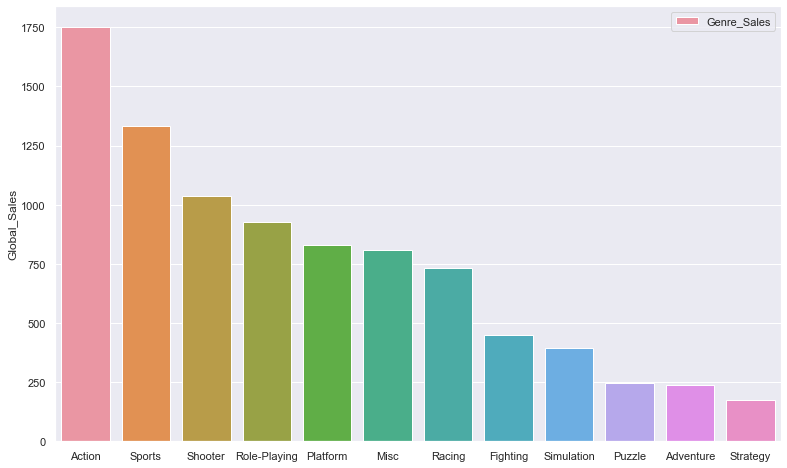

In [26]:
x=list(df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False).index)
y=df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(13,8)})
sns.barplot(x,y,label="Genre_Sales")
plt.legend()
plt.show()

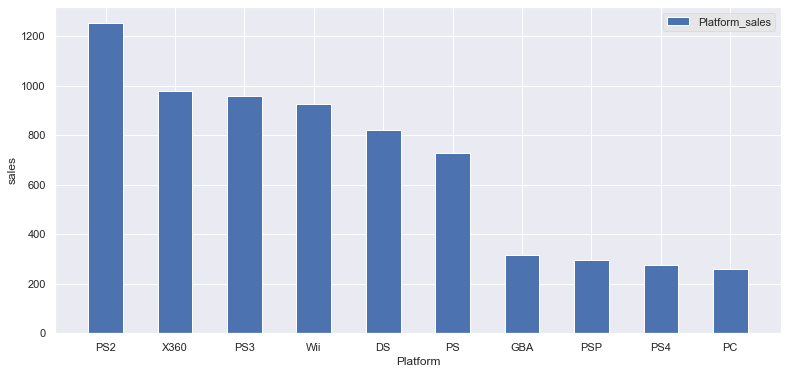

In [27]:
x=list(df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False).iloc[:10].index)
y=df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending= False).iloc[:10]
plt.figure(figsize=[13,6])
plt.bar(x,y,width=.5,label="Platform_sales",color="#4C72B0")
plt.xlabel("Platform")
plt.ylabel("sales")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

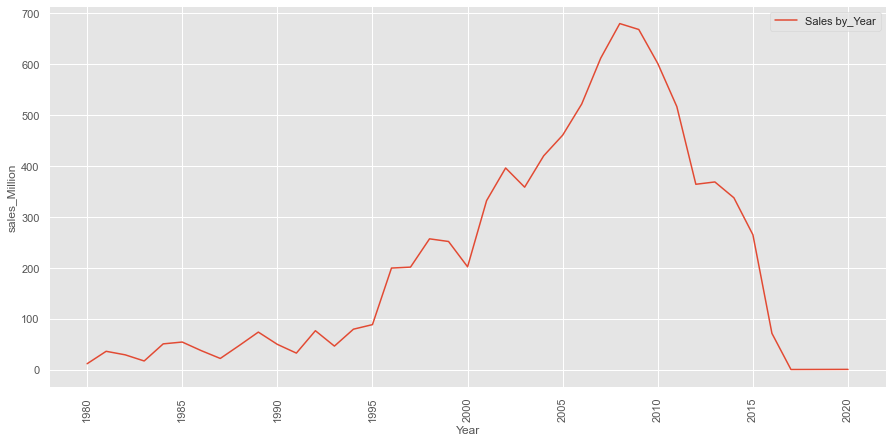

In [28]:
plt.figure(figsize=[15,7])
plt.plot(df.groupby("Year")["Global_Sales"].sum(),label="Sales by_Year")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.xlabel("Year")
plt.ylabel("sales_Million")
plt.grid(True)
plt.legend()
plt.show()

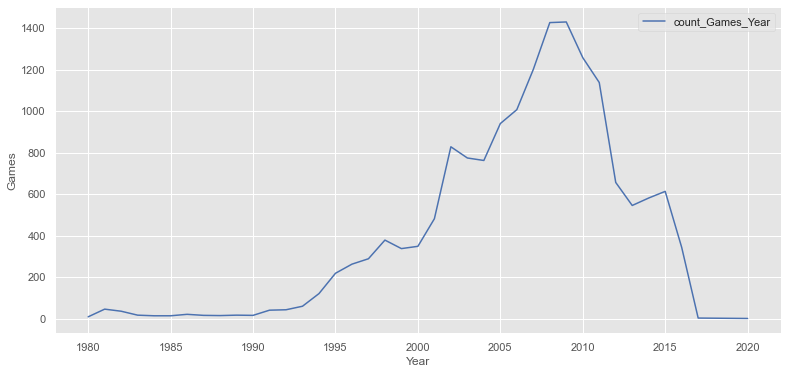

In [29]:
plt.figure(figsize=[13,6])
plt.plot(df.groupby("Year")["Name"].count(),label="count_Games_Year",color="#4C72B0")
plt.xlabel("Year")
plt.ylabel("Games")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

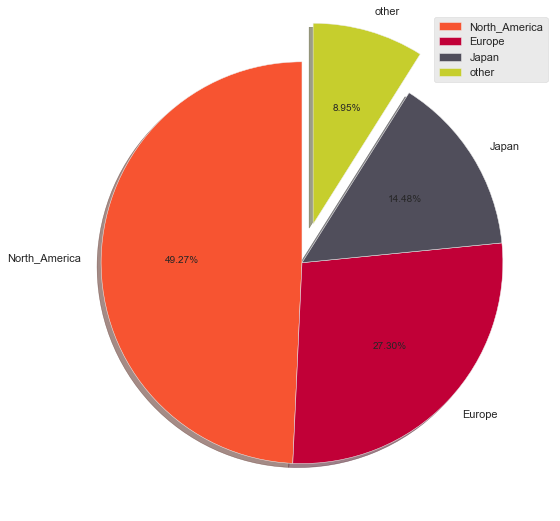

In [30]:
North_America=df["North_America_Sales"].sum()
Europe=df["Europe_Sales"].sum()
Japan=df["Japan_Sales"].sum()
other=df["Other_Sales"].sum()
y=[North_America,Europe,Japan,other]
labels=["North_America","Europe","Japan","other"]
myexplode = [0, 0, 0, 0.2]
plt.figure(figsize=[9,10])
colors = ["#F75431", "#C10037","#504E5B", "#C6CE2D"]
plt.pie(y,labels=labels,colors=colors,shadow=True,startangle = 90,explode=myexplode,autopct='%1.2f%%')
plt.legend()
plt.style.use('ggplot')
plt.grid(True)
plt.show()

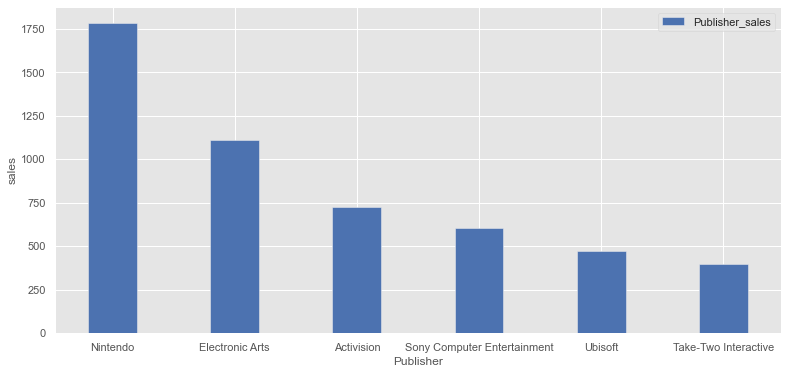

In [31]:
x=list(df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending = False).iloc[:6].index)
y=df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending= False).iloc[:6]
plt.figure(figsize=[13,6])
plt.bar(x,y,width=.4,label="Publisher_sales",color="#4C72B0")
plt.xlabel("Publisher")
plt.ylabel("sales")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

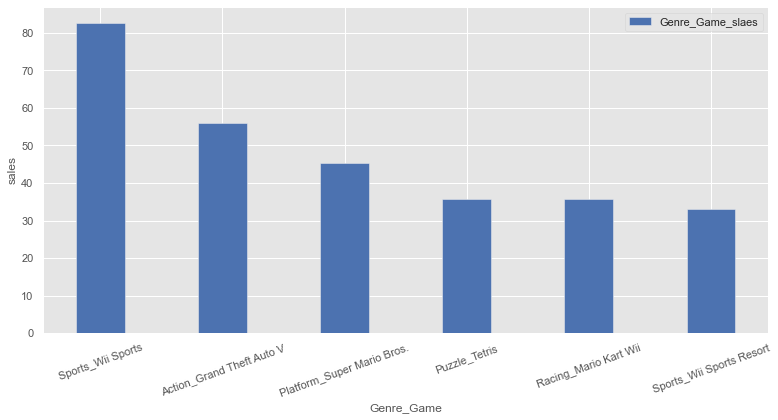

In [32]:
x=list(df.groupby(["Genre","Name"])["Global_Sales"].sum().sort_values(ascending=False).iloc[:6].index)
X=[_[0]+"_"+_[1] for _ in x]
y=list(df.groupby(["Genre","Name"])["Global_Sales"].sum().sort_values(ascending=False).iloc[:6])
plt.figure(figsize=[13,6])
plt.bar(X,y,width=.4,label="Genre_Game_slaes",color="#4C72B0")
plt.xticks(rotation=20)
plt.xlabel("Genre_Game")
plt.ylabel("sales")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
df.head(2)

,Name,Genre,Platform,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Year
0,Wii Sports,Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,Super Mario Bros.,Platform,NES,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0


In [34]:
from numpy.polynomial.polynomial import polyfit

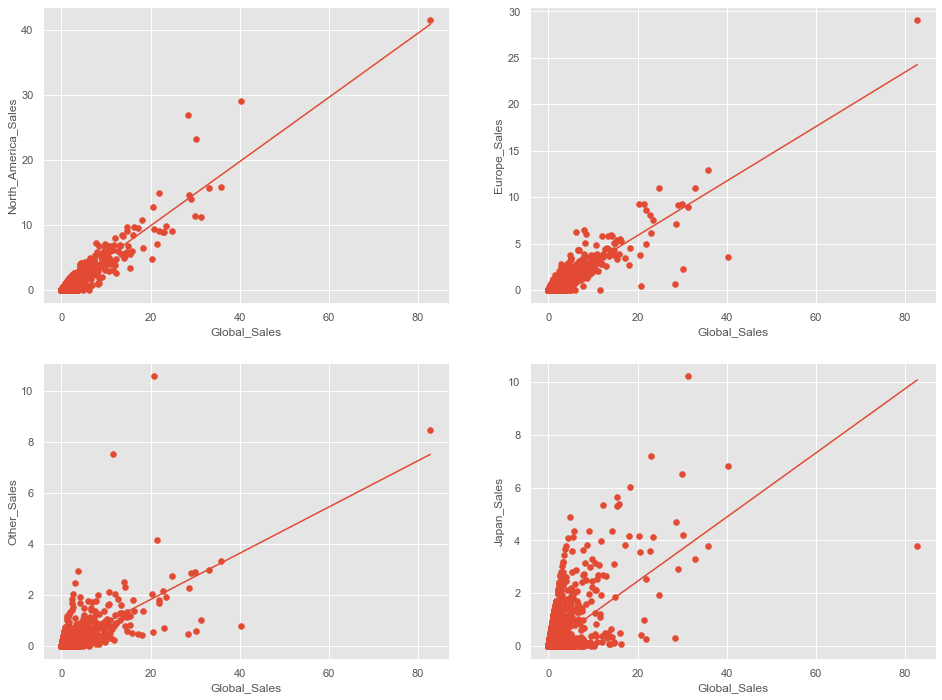

In [35]:
plt.figure(figsize=[16,12])
plt.subplot(2,2,1)
plt.scatter(df["Global_Sales"],df["North_America_Sales"])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df["Global_Sales"], df["North_America_Sales"], 1)
#add linear regression line to scatterplot 
plt.plot(df["Global_Sales"], m*df["Global_Sales"]+b)
plt.xlabel("Global_Sales")
plt.ylabel("North_America_Sales")
plt.style.use('ggplot')
plt.grid(True)
plt.subplot(2,2,2)
plt.scatter(df["Global_Sales"],df["Europe_Sales"])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df["Global_Sales"], df["Europe_Sales"], 1)
#add linear regression line to scatterplot 
plt.plot(df["Global_Sales"], m*df["Global_Sales"]+b)
plt.xlabel("Global_Sales")
plt.ylabel("Europe_Sales")
plt.style.use('ggplot')
plt.grid(True)
plt.subplot(2,2,3)
plt.scatter(df["Global_Sales"],df["Other_Sales"])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df["Global_Sales"], df["Other_Sales"], 1)
#add linear regression line to scatterplot 
plt.plot(df["Global_Sales"], m*df["Global_Sales"]+b)
plt.xlabel("Global_Sales")
plt.ylabel("Other_Sales")
plt.style.use('ggplot')
plt.grid(True)
plt.subplot(2,2,4)
plt.scatter(df["Global_Sales"],df["Japan_Sales"])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df["Global_Sales"], df["Japan_Sales"], 1)
#add linear regression line to scatterplot 
plt.plot(df["Global_Sales"], m*df["Global_Sales"]+b)
plt.xlabel("Global_Sales")
plt.ylabel("Japan_Sales")
plt.style.use('ggplot')
plt.grid(True)

In [36]:
df.corr(method ='kendall')

,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Year
North_America_Sales,1.000000,0.556031,-0.181112,0.640092,0.675652,-0.094939
Europe_Sales,0.556031,1.000000,-0.143193,0.661482,0.561736,-0.047794
Japan_Sales,-0.181112,-0.143193,1.000000,-0.058865,0.126682,0.013893
Other_Sales,0.640092,0.661482,-0.058865,1.000000,0.684007,0.041790
Global_Sales,0.675652,0.561736,0.126682,0.684007,1.000000,-0.105730
Year,-0.094939,-0.047794,0.013893,0.041790,-0.105730,1.000000
